In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rc('font', family='Malgun Gothic') # 한글 폰트

In [3]:
os.getcwd()

'C:\\Users\\User\\Imbalanced'

In [4]:
data_dir = './data/'
TRAIN = 'train.csv'

In [5]:
df = pd.read_csv(os.path.join(data_dir, TRAIN))
display(df)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276848,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors with Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0-10'),
  Text(1, 0, '11-20'),
  Text(2, 0, '21-30'),
  Text(3, 0, '31-40'),
  Text(4, 0, '41-50'),
  Text(5, 0, '51-60'),
  Text(6, 0, '61-70'),
  Text(7, 0, '71-80'),
  Text(8, 0, '81-90'),
  Text(9, 0, '91-100'),
  Text(10, 0, 'More than 100 Days')])

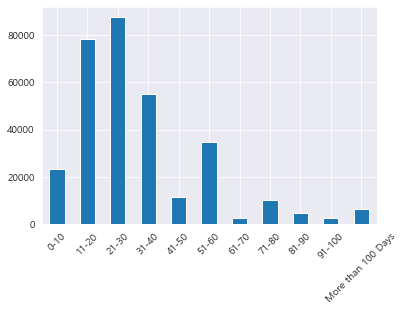

In [21]:
df['Stay'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=45)

<AxesSubplot:>

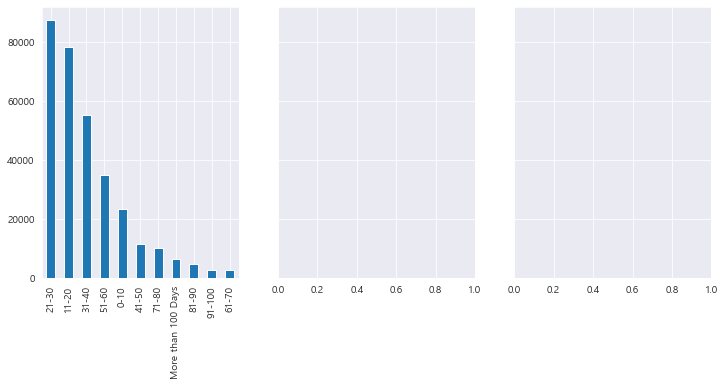

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(12,5), sharey=True)

df['Stay'].value_counts().plot(kind='bar', ax=axes[0])